In [1]:
from Prototype.qpu_generators.edge_gadget_qpu_generator import EdgeGadgetQPUGenerator
from Prototype.qpu_generators.arbitrary_connectivity_qpu_generator import ArbitraryConnectivityQPUGenerator
from Prototype.crystals.crystal_structure import CrystalStructure
import matplotlib.pyplot as plt
import numpy as np
from Prototype.simulation.machine_generator import MachineGenerator
from pulser import Pulse, Register, Sequence
from pulser.register.register_layout import RegisterLayout

In [2]:
machine = MachineGenerator.getMachine("chadoq3")

In [3]:
crystal = CrystalStructure.from_file("../../native_crystal_database/three_edges_binary.dat")

edgeGadgetGenerator = EdgeGadgetQPUGenerator(
    weights_detuning_fraction=0.1,
    next_nearest_neighbour_detuning_correction=0.1,
    crystal=crystal,
    atomic_min_distance=machine.min_atom_distance
)
edge_qpu_properties = edgeGadgetGenerator.convert()

arbitraryGadgetGenerator = ArbitraryConnectivityQPUGenerator(
    weights_detuning_fraction=0.1,
    copy_gadget_detuning_correction=0,
    next_nearest_neighbour_detuning_correction=0.1,
    two_species_penalty=1,
    no_species_penalty=1,
    crystal=crystal,
    atomic_min_distance=machine.min_atom_distance
)
arbitrary_qpu_properties = arbitraryGadgetGenerator.convert()

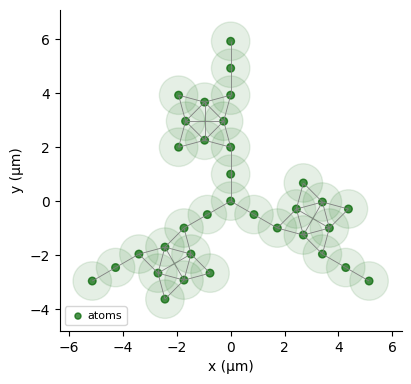

In [18]:
coords = np.array([atomSpec.getPosition() for atomSpec in edge_qpu_properties["atom_specs"]])
detunings = np.array([atomSpec.getDetuning() for atomSpec in edge_qpu_properties["atom_specs"]])
detunings_normalized = detunings / detunings.sum()

register = Register.from_coordinates(
    [atomSpec.getPosition() for atomSpec in edge_qpu_properties["atom_specs"]],
    center = True,
    prefix = "q"
)
register_layout = RegisterLayout(coords)
detuning_map = register_layout.define_detuning_map({
    i: detunings_normalized[i] for i in range(len(coords))
})

register.draw(
    with_labels=False,
    blockade_radius=edge_qpu_properties["rydberg_radius"]*1.01,
    draw_half_radius=True
)

In [5]:
np.array(list(register.qubits.values())).shape

(34, 2)

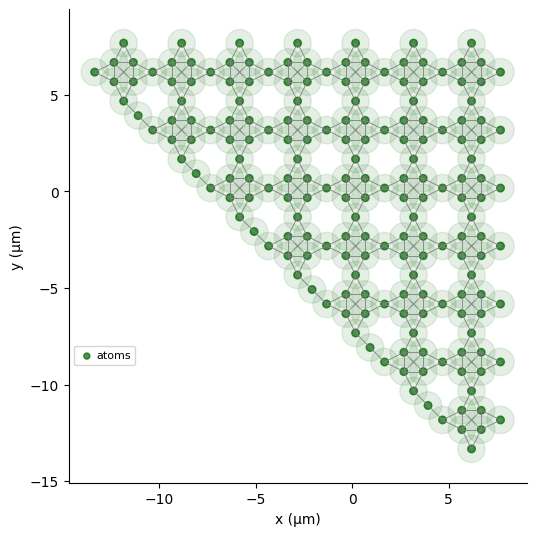

In [16]:
register = Register.from_coordinates(
    [atomSpec.getPosition() for atomSpec in arbitrary_qpu_properties["atom_specs"]],
    center = True,
    prefix = "q"
)
register.draw(
    with_labels=False,
    blockade_radius=arbitrary_qpu_properties["rydberg_radius"] * 1,
    draw_half_radius=True
)

In [9]:
from Prototype.simulation.sequence_builder import SequenceBuilder

crystal = CrystalStructure.from_file("../../native_crystal_database/three_edges_binary.dat")
seq = SequenceBuilder(crystal).create_sequence()

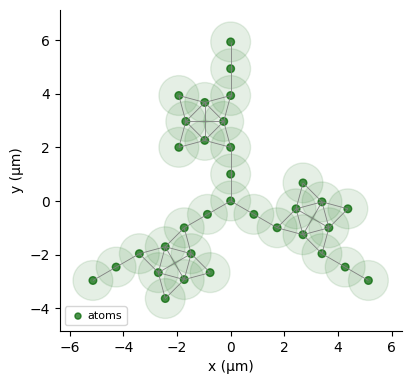